In [81]:
import requests
import json
from DbConn import *
from datetime import datetime, timedelta

def moviecd_dataframe():
    db = DbConn()
    
    select_query = """
    select *
    from
    (
    select moviecd, movienm, to_char(opendt, 'yyyy'), max_audiacc
    from movie2
    order by max_audiacc desc
    )
    where rownum <= 100
    """
    
    select_result = db.execute(select_query)

    print("첫주 작업 완료. -----")
    db.disconnect()
    return  select_result


def moviecd_get_dataframe(year,moviecd):
    db = DbConn()
    params = {"year":year,"moviecd":moviecd}
    select_query = """
    
    select moviecd, movienm, to_char(opendt, 'yyyy'), max_audiacc
    from movie2
    where to_char(opendt, 'yyyy') = :year and moviecd = :moviecd
    order by max_audiacc desc
        
    """
    
    select_result = db.execute(select_query,params)

    print("첫주 작업 완료. -----")
    db.disconnect()
    return  select_result




def race_dataframe(year):
    db = DbConn()
    params = {"year":year}
    select_query = """
    select *
    from
    (
    select movienm, to_char(opendt, 'yyyy'), max_audiacc
    from movie2
    where to_char(opendt, 'yyyy') = :year
    order by max_audiacc desc
    )
    where rownum <= 20

    """
    
#     where  opendt +:day = dailydate2 and dailydate2 < TO_DATE('19/01/01', 'YY/mm/dd') 
#     params = {"day":day}
    select_result = db.execute(select_query,params)

    print("첫주 작업 완료. -----")
    db.disconnect()
    return  select_result
# day =30

def max_dataframe():
    db = DbConn()
    
    select_query = """
    select moviecd,  max(audiacc)
    from boxoffice 
    group by moviecd
    order by moviecd
    """
    select_result = db.execute(select_query)

    print("누적 작업 완료. -----")
    db.disconnect()
    return  select_result

# print(race_dataframe(2003))

print(moviecd_dataframe())


첫주 작업 완료. -----
[(20129370, '명량', '2014', 17583608), (20182530, '극한직업', '2019', 16252575), (20150976, '신과함께-죄와 벌', '2017', 14401147), (20137048, '국제시장', '2014', 14241429), (20184889, '어벤져스: 엔드게임', '2019', 13908898), (20148048, '베테랑', '2015', 13403414), (20197803, '겨울왕국 2', '2019', 13369064), (20090834, '아바타', '2009', 13326826), (20124034, '도둑들', '2012', 12976528), (20127593, '7번방의 선물', '2013', 12801369), (20148851, '암살', '2015', 12686446), (20183867, '알라딘', '2019', 12534560), (20124079, '광해, 왕이 된 남자', '2012', 12291293), (20186202, '신과함께-인과 연', '2018', 12264813), (20162869, '택시운전사', '2017', 12166659), (20156564, '부산행', '2016', 11551067), (20134803, '변호인', '2013', 11358191), (20090074, '해운대', '2009', 11287394), (20177478, '어벤져스: 인피니티 워', '2018', 11181178), (20060151, '괴물', '2006', 10912664), (20050333, '왕의 남자', '2005', 10495829), (20148493, '어벤져스: 에이지 오브 울트론', '2015', 10482686), (20149120, '인터스텔라', '2014', 10283774), (20136803, '겨울왕국', '2014', 10270423), (20183782, '기생충', '2019', 1006524

In [82]:
moviecd_list = moviecd_dataframe()

첫주 작업 완료. -----


In [83]:
moviecd_get_dataframe(2003, 20050333)

첫주 작업 완료. -----


[]

In [84]:
moviecd_get_dataframe(2005,20050333)[0][1]

첫주 작업 완료. -----


'왕의 남자'

In [85]:
moviecd_list_onoff = []
# moviecd_list_people = []
for i in moviecd_list:
    moviecd_list_onoff.append(0)
#     moviecd_list_people.append(0)

In [86]:
moviecd_list[0]

(20129370, '명량', '2014', 17583608)

In [87]:
data = {}
for i in range(2003,2020):
    temp_list = []
    temp_list2 = []
    print(i,"할차례")
    cnt = 0
    for j in moviecd_list:
        if moviecd_list_onoff[cnt] ==1 :
            temp_list.append({"network": moviecd_list[cnt][1],"MAU": moviecd_list[cnt][3]})
        else:
            nowmovie = moviecd_get_dataframe(i,j[0])
            if len(nowmovie) >0 :
                print("network",nowmovie[0][1],"MAU",nowmovie[0][3])
                temp_list.append({"network": nowmovie[0][1],"MAU": nowmovie[0][3]})
                moviecd_list_onoff[cnt] = 1
#                 moviecd_list_people[cnt] = nowmovie[0][3]
            else:
                print("network", j[1],"MAU", "0")
                temp_list.append({"network": j[1],"MAU": 0})
            
#             moviecd_list[cnt][0] # 해당영화의 CD
#             moviecd_list[cnt][1] # 해당영화의 이름
#             moviecd_list[cnt][3] # 해당영화의 최대관객수
        
#         print(moviecd_get_dataframe(i,j[0]))
        
        
        cnt += 1
#     print(temp_list)
    data[str(i)] = temp_list
    
print(data)

2003 할차례
첫주 작업 완료. -----
network 명량 MAU 0
첫주 작업 완료. -----
network 극한직업 MAU 0
첫주 작업 완료. -----
network 신과함께-죄와 벌 MAU 0
첫주 작업 완료. -----
network 국제시장 MAU 0
첫주 작업 완료. -----
network 어벤져스: 엔드게임 MAU 0
첫주 작업 완료. -----
network 베테랑 MAU 0
첫주 작업 완료. -----
network 겨울왕국 2 MAU 0
첫주 작업 완료. -----
network 아바타 MAU 0
첫주 작업 완료. -----
network 도둑들 MAU 0
첫주 작업 완료. -----
network 7번방의 선물 MAU 0
첫주 작업 완료. -----
network 암살 MAU 0
첫주 작업 완료. -----
network 알라딘 MAU 0
첫주 작업 완료. -----
network 광해, 왕이 된 남자 MAU 0
첫주 작업 완료. -----
network 신과함께-인과 연 MAU 0
첫주 작업 완료. -----
network 택시운전사 MAU 0
첫주 작업 완료. -----
network 부산행 MAU 0
첫주 작업 완료. -----
network 변호인 MAU 0
첫주 작업 완료. -----
network 해운대 MAU 0
첫주 작업 완료. -----
network 어벤져스: 인피니티 워 MAU 0
첫주 작업 완료. -----
network 괴물 MAU 0
첫주 작업 완료. -----
network 왕의 남자 MAU 0
첫주 작업 완료. -----
network 어벤져스: 에이지 오브 울트론 MAU 0
첫주 작업 완료. -----
network 인터스텔라 MAU 0
첫주 작업 완료. -----
network 겨울왕국 MAU 0
첫주 작업 완료. -----
network 기생충 MAU 0
첫주 작업 완료. -----
network 보헤미안 랩소디 MAU 0
첫주 작업 완료. -----
network 검사외전 MAU 0
첫주 작업

network 겨울왕국 MAU 0
첫주 작업 완료. -----
network 기생충 MAU 0
첫주 작업 완료. -----
network 보헤미안 랩소디 MAU 0
첫주 작업 완료. -----
network 검사외전 MAU 0
첫주 작업 완료. -----
network 엑시트 MAU 0
첫주 작업 완료. -----
network 설국열차 MAU 0
첫주 작업 완료. -----
network 관상 MAU 0
첫주 작업 완료. -----
network 아이언맨 3 MAU 0
첫주 작업 완료. -----
network 캡틴 아메리카: 시빌 워 MAU 0
첫주 작업 완료. -----
network 수상한 그녀 MAU 0
첫주 작업 완료. -----
network 해적: 바다로 간 산적 MAU 0
첫주 작업 완료. -----
network 과속스캔들 MAU 0
첫주 작업 완료. -----
network 국가대표 MAU 0
첫주 작업 완료. -----
network 스파이더맨: 파 프롬 홈 MAU 0
첫주 작업 완료. -----
network 디워 MAU 0
첫주 작업 완료. -----
network 공조 MAU 0
첫주 작업 완료. -----
network 히말라야 MAU 0
첫주 작업 완료. -----
network 트랜스포머 3 MAU 0
첫주 작업 완료. -----
network 미션임파서블:고스트프로토콜 MAU 0
첫주 작업 완료. -----
network 밀정 MAU 0
첫주 작업 완료. -----
network 최종병기 활 MAU 0
첫주 작업 완료. -----
network 트랜스포머: 패자의 역습 MAU 0
첫주 작업 완료. -----
network 트랜스포머 MAU 0
첫주 작업 완료. -----
network 써니 MAU 0
첫주 작업 완료. -----
network 스파이더맨: 홈 커밍 MAU 0
첫주 작업 완료. -----
network 1987 MAU 0
첫주 작업 완료. -----
network 베를린 MAU 0
첫주 작업 완료. -----
n

첫주 작업 완료. -----
network 터널 MAU 0
첫주 작업 완료. -----
network 어벤져스 MAU 0
첫주 작업 완료. -----
network 내부자들 MAU 0
첫주 작업 완료. -----
network 인천상륙작전 MAU 0
첫주 작업 완료. -----
network 럭키 MAU 0
첫주 작업 완료. -----
network 은밀하게 위대하게 MAU 0
첫주 작업 완료. -----
network 범죄도시 MAU 0
첫주 작업 완료. -----
network 곡성 MAU 0
첫주 작업 완료. -----
network 화려한 휴가 MAU 6841937
첫주 작업 완료. -----
network 좋은 놈, 나쁜 놈, 이상한 놈 MAU 0
첫주 작업 완료. -----
network 늑대소년 MAU 0
첫주 작업 완료. -----
network 군함도 MAU 0
첫주 작업 완료. -----
network 미션 임파서블: 폴아웃 MAU 0
첫주 작업 완료. -----
network 다크 나이트 라이즈 MAU 0
첫주 작업 완료. -----
network 백두산 MAU 0
첫주 작업 완료. -----
network 사도 MAU 0
첫주 작업 완료. -----
network 아저씨 MAU 0
첫주 작업 완료. -----
network 킹스맨 : 시크릿 에이전트 MAU 0
첫주 작업 완료. -----
network 미션 임파서블: 로그네이션 MAU 0
첫주 작업 완료. -----
network 전우치 MAU 0
첫주 작업 완료. -----
network 연평해전 MAU 0
첫주 작업 완료. -----
network 레미제라블 MAU 0
첫주 작업 완료. -----
network 인셉션 MAU 0
첫주 작업 완료. -----
network 캡틴 마블 MAU 0
첫주 작업 완료. -----
network 쥬라기 월드: 폴른 킹덤 MAU 0
첫주 작업 완료. -----
network 청년경찰 MAU 0
첫주 작업 완료. -----
network 숨바꼭질 M

첫주 작업 완료. -----
network 완벽한 타인 MAU 0
첫주 작업 완료. -----
network 월드 워 Z MAU 0
첫주 작업 완료. -----
network 조커 MAU 0
첫주 작업 완료. -----
network 타워 MAU 0
첫주 작업 완료. -----
network 미녀와 야수 MAU 0
2010 할차례
첫주 작업 완료. -----
network 명량 MAU 0
첫주 작업 완료. -----
network 극한직업 MAU 0
첫주 작업 완료. -----
network 신과함께-죄와 벌 MAU 0
첫주 작업 완료. -----
network 국제시장 MAU 0
첫주 작업 완료. -----
network 어벤져스: 엔드게임 MAU 0
첫주 작업 완료. -----
network 베테랑 MAU 0
첫주 작업 완료. -----
network 겨울왕국 2 MAU 0
첫주 작업 완료. -----
network 도둑들 MAU 0
첫주 작업 완료. -----
network 7번방의 선물 MAU 0
첫주 작업 완료. -----
network 암살 MAU 0
첫주 작업 완료. -----
network 알라딘 MAU 0
첫주 작업 완료. -----
network 광해, 왕이 된 남자 MAU 0
첫주 작업 완료. -----
network 신과함께-인과 연 MAU 0
첫주 작업 완료. -----
network 택시운전사 MAU 0
첫주 작업 완료. -----
network 부산행 MAU 0
첫주 작업 완료. -----
network 변호인 MAU 0
첫주 작업 완료. -----
network 어벤져스: 인피니티 워 MAU 0
첫주 작업 완료. -----
network 어벤져스: 에이지 오브 울트론 MAU 0
첫주 작업 완료. -----
network 인터스텔라 MAU 0
첫주 작업 완료. -----
network 겨울왕국 MAU 0
첫주 작업 완료. -----
network 기생충 MAU 0
첫주 작업 완료. -----
network 보헤미안 랩소디 MAU 0


첫주 작업 완료. -----
network 킹스맨 : 시크릿 에이전트 MAU 0
첫주 작업 완료. -----
network 미션 임파서블: 로그네이션 MAU 0
첫주 작업 완료. -----
network 연평해전 MAU 0
첫주 작업 완료. -----
network 레미제라블 MAU 5858224
첫주 작업 완료. -----
network 캡틴 마블 MAU 0
첫주 작업 완료. -----
network 쥬라기 월드: 폴른 킹덤 MAU 0
첫주 작업 완료. -----
network 청년경찰 MAU 0
첫주 작업 완료. -----
network 숨바꼭질 MAU 0
첫주 작업 완료. -----
network 더 테러 라이브 MAU 0
첫주 작업 완료. -----
network 덕혜옹주 MAU 0
첫주 작업 완료. -----
network 쥬라기 월드 MAU 0
첫주 작업 완료. -----
network 감시자들 MAU 0
첫주 작업 완료. -----
network 앤트맨과 와스프 MAU 0
첫주 작업 완료. -----
network 닥터 스트레인지 MAU 0
첫주 작업 완료. -----
network 검은 사제들 MAU 0
첫주 작업 완료. -----
network 안시성 MAU 0
첫주 작업 완료. -----
network 블랙 팬서 MAU 0
첫주 작업 완료. -----
network 더 킹 MAU 0
첫주 작업 완료. -----
network 트랜스포머: 사라진 시대 MAU 0
첫주 작업 완료. -----
network 완벽한 타인 MAU 0
첫주 작업 완료. -----
network 월드 워 Z MAU 0
첫주 작업 완료. -----
network 조커 MAU 0
첫주 작업 완료. -----
network 타워 MAU 5161459
첫주 작업 완료. -----
network 미녀와 야수 MAU 0
2013 할차례
첫주 작업 완료. -----
network 명량 MAU 0
첫주 작업 완료. -----
network 극한직업 MAU 0
첫주 작업 완료. ----

첫주 작업 완료. -----
network 공조 MAU 0
첫주 작업 완료. -----
network 밀정 MAU 7483039
첫주 작업 완료. -----
network 스파이더맨: 홈 커밍 MAU 0
첫주 작업 완료. -----
network 1987 MAU 0
첫주 작업 완료. -----
network 마스터 MAU 7138983
첫주 작업 완료. -----
network 터널 MAU 7118946
첫주 작업 완료. -----
network 인천상륙작전 MAU 7043241
첫주 작업 완료. -----
network 럭키 MAU 6973125
첫주 작업 완료. -----
network 범죄도시 MAU 0
첫주 작업 완료. -----
network 곡성 MAU 6860489
첫주 작업 완료. -----
network 군함도 MAU 0
첫주 작업 완료. -----
network 미션 임파서블: 폴아웃 MAU 0
첫주 작업 완료. -----
network 백두산 MAU 0
첫주 작업 완료. -----
network 캡틴 마블 MAU 0
첫주 작업 완료. -----
network 쥬라기 월드: 폴른 킹덤 MAU 0
첫주 작업 완료. -----
network 청년경찰 MAU 0
첫주 작업 완료. -----
network 덕혜옹주 MAU 5568719
첫주 작업 완료. -----
network 앤트맨과 와스프 MAU 0
첫주 작업 완료. -----
network 닥터 스트레인지 MAU 5441786
첫주 작업 완료. -----
network 안시성 MAU 0
첫주 작업 완료. -----
network 블랙 팬서 MAU 0
첫주 작업 완료. -----
network 더 킹 MAU 0
첫주 작업 완료. -----
network 완벽한 타인 MAU 0
첫주 작업 완료. -----
network 조커 MAU 0
첫주 작업 완료. -----
network 미녀와 야수 MAU 0
2017 할차례
첫주 작업 완료. -----
network 극한직업 MAU 0
첫주 작업 완료. 

In [88]:
moviecd_list = []
for i in moviecd_dataframe():
    moviecd_list.append(i[0])

첫주 작업 완료. -----


In [89]:
moviecd_list

[20129370,
 20182530,
 20150976,
 20137048,
 20184889,
 20148048,
 20197803,
 20090834,
 20124034,
 20127593,
 20148851,
 20183867,
 20124079,
 20186202,
 20162869,
 20156564,
 20134803,
 20090074,
 20177478,
 20060151,
 20050333,
 20148493,
 20149120,
 20136803,
 20183782,
 20185485,
 20145507,
 20184621,
 20126674,
 20126091,
 20121621,
 20159364,
 20131102,
 20136064,
 20081672,
 20090307,
 20196309,
 20070316,
 20151228,
 20136068,
 20110659,
 20112207,
 20159646,
 20110302,
 20090303,
 20070061,
 20110193,
 20167303,
 20170590,
 20124083,
 20161725,
 20154910,
 20124721,
 20149314,
 20156250,
 20153444,
 20126672,
 20172742,
 20140194,
 20070209,
 20072152,
 20124054,
 20161481,
 20181181,
 20050180,
 20112703,
 20192206,
 20148846,
 20100214,
 20140110,
 20157881,
 20090077,
 20060387,
 20134798,
 20128274,
 20100312,
 20181877,
 20060277,
 20179086,
 20162442,
 20136049,
 20136052,
 20150979,
 20098169,
 20122783,
 20180522,
 20163181,
 20145503,
 20176122,
 20090904,
 20090685,

In [90]:
year_list = []
data = {}
for i in range(2003,2020):
#     print(race_dataframe(i))
#     year_list.append(race_dataframe(i))
    temp_list = []
    temp_list2 = []
    for j in race_dataframe(i):
        temp_list.append({"network": j[0],"MAU": j[2]})
        temp_list2.append({"network": j[0],"MAU": 0})
    data[str(i)] = temp_list
    data[2002] = temp_list2
    
print(data)

    

첫주 작업 완료. -----
첫주 작업 완료. -----
첫주 작업 완료. -----
첫주 작업 완료. -----
첫주 작업 완료. -----
첫주 작업 완료. -----
첫주 작업 완료. -----
첫주 작업 완료. -----
첫주 작업 완료. -----
첫주 작업 완료. -----
첫주 작업 완료. -----
첫주 작업 완료. -----
첫주 작업 완료. -----
첫주 작업 완료. -----
첫주 작업 완료. -----
첫주 작업 완료. -----
첫주 작업 완료. -----
{'2007': [{'MAU': 7854274, 'network': '디워'}, {'MAU': 7350496, 'network': '트랜스포머'}, {'MAU': 6841937, 'network': '화려한 휴가'}, {'MAU': 4589877, 'network': '스파이더맨 3'}, {'MAU': 4568697, 'network': '캐리비안의 해적: 세상의 끝에서'}, {'MAU': 3677029, 'network': '해리 포터와 불사조 기사단'}, {'MAU': 3152830, 'network': '다이 하드 4 : 죽어도 산다'}, {'MAU': 2961119, 'network': '식객'}, {'MAU': 2936214, 'network': '그놈 목소리'}, {'MAU': 2905342, 'network': '300'}, {'MAU': 2903960, 'network': '황금 나침반'}, {'MAU': 2823007, 'network': '슈렉3'}, {'MAU': 2531834, 'network': '1번가의 기적'}, {'MAU': 2370395, 'network': '나는 전설이다'}, {'MAU': 2131414, 'network': '바르게 살자'}, {'MAU': 2127080, 'network': '어거스트 러쉬'}, {'MAU': 2074674, 'network': '극락도 살인사건'}, {'MAU': 2020299, 'network': '세븐 데이즈

In [ ]:
data = {
    "2003": [
    {
        "network": i[0],
        "MAU": i[2]
    },
    {
        "network": "Flickr",
        "MAU": 0
    },

In [11]:
data = {
    year_list[0][0][1] : [
        {
            "network": year_list[0][0][0],
            "MAU" : year_list[0][0][2]
        },
         {
            "network": year_list[0][1][0],
            "MAU" : year_list[0][2][2]
        }
    ]
}
year_list[0]

[('실미도', '2003', 1717703),
 ('반지의 제왕 : 왕의 귀환', '2003', 700587),
 ('러브 액츄얼리', '2003', 306422),
 ('올드보이', '2003', 296945),
 ('동해물과 백두산이', '2003', 163084),
 ('해피 에로 크리스마스', '2003', 71441),
 ('니모를 찾아서', '2003', 71406),
 ('매트릭스3 레볼루션', '2003', 50543),
 ('낭만자객', '2003', 48744),
 ('마스터 앤드 커맨더: 위대한 정복자', '2003', 45523),
 ('킬빌', '2003', 38442),
 ('...ing', '2003', 34264),
 ('냉정과 열정사이', '2003', 33869),
 ('더 캣', '2003', 32784),
 ('사토라레', '2003', 30598),
 ('프리다', '2003', 26153),
 ('위대한 유산', '2003', 24703),
 ('천년호', '2003', 24546),
 ('춤추는 대수사선 2', '2003', 19882),
 ('아이덴티티', '2003', 19873)]

In [105]:
import pandas as pd
df_week= []
for i in range(0,day):
    df_week_column_name = ['mnumber', 'dpeople+'+str(i)]
    df_week.append( pd.DataFrame(week_dataframe(i), columns=df_week_column_name) )
df_week


첫주 작업 완료. -----
첫주 작업 완료. -----
첫주 작업 완료. -----
첫주 작업 완료. -----
첫주 작업 완료. -----
첫주 작업 완료. -----
첫주 작업 완료. -----
첫주 작업 완료. -----
첫주 작업 완료. -----
첫주 작업 완료. -----
첫주 작업 완료. -----
첫주 작업 완료. -----
첫주 작업 완료. -----
첫주 작업 완료. -----
첫주 작업 완료. -----
첫주 작업 완료. -----
첫주 작업 완료. -----
첫주 작업 완료. -----
첫주 작업 완료. -----
첫주 작업 완료. -----
첫주 작업 완료. -----
첫주 작업 완료. -----
첫주 작업 완료. -----
첫주 작업 완료. -----
첫주 작업 완료. -----
첫주 작업 완료. -----
첫주 작업 완료. -----
첫주 작업 완료. -----
첫주 작업 완료. -----
첫주 작업 완료. -----


[       mnumber  dpeople+0
 0     20041524       6354
 1     20068576      67607
 2     20068659       8827
 3     20078561      41627
 4     20098169     274719
 5     20100211       2578
 6     20122021     467419
 7     20122787      27304
 8     20123501     551841
 9     20124047       5451
 10    20126090      60234
 11    20129370     682701
 12    20129787      66643
 13    20130021      79801
 14    20130442      79698
 15    20130522      47918
 16    20130561      58083
 17    20130566      50014
 18    20130574      26982
 19    20131102     142843
 20    20131248      72041
 21    20131262      73635
 22    20132482     121991
 23    20133322      89092
 24    20133585       6448
 25    20133601       3695
 26    20133602     177380
 27    20133603      10451
 28    20133641       7922
 29    20133682      13888
 ...        ...        ...
 997   20186501     162242
 998   20186822       8615
 999   20187427      87322
 1000  20187521       2557
 1001  20187641      61884
 

In [106]:
df_max_column_name = ['mnumber', 'sum_total_people']
df_max = pd.DataFrame(max_dataframe(), columns=df_max_column_name )
df_max.tail()

누적 작업 완료. -----


,mnumber,sum_total_people
1548,20199949,8991
1549,20199950,5234641
1550,20199951,471266
1551,20199954,8491
1552,20199981,143853


In [107]:
df = pd.merge(df_week[0],df_max, on='mnumber')

for i in range(1,day) :
    df = pd.merge(df_week[i],df, on='mnumber', how='outer')

df.tail()

,mnumber,dpeople+29,dpeople+28,dpeople+27,dpeople+26,dpeople+25,dpeople+24,dpeople+23,dpeople+22,dpeople+21,...,dpeople+8,dpeople+7,dpeople+6,dpeople+5,dpeople+4,dpeople+3,dpeople+2,dpeople+1,dpeople+0,sum_total_people
1217,20179286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3869.0,3869.0
1218,20181764,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4049.0,9091.0
1219,20183307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1689.0,2015.0
1220,20184529,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5042.0,6370.0
1221,20187682,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1267.0,2654.0


In [108]:
for i in range(0,day) :
    df['dpeople+'+str(i)] = df['dpeople+'+str(i)].fillna(0)

df.tail()

,mnumber,dpeople+29,dpeople+28,dpeople+27,dpeople+26,dpeople+25,dpeople+24,dpeople+23,dpeople+22,dpeople+21,...,dpeople+8,dpeople+7,dpeople+6,dpeople+5,dpeople+4,dpeople+3,dpeople+2,dpeople+1,dpeople+0,sum_total_people
1217,20179286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3869.0,3869.0
1218,20181764,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4049.0,9091.0
1219,20183307,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1689.0,2015.0
1220,20184529,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5042.0,6370.0
1221,20187682,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1267.0,2654.0


In [109]:
# df['sum_total_people'].describe()
print(df['sum_total_people'].quantile(q=0.9, interpolation='nearest'),
      df['sum_total_people'].quantile(q=0.75, interpolation='nearest'),
      df['sum_total_people'].quantile(q=0.5, interpolation='nearest'),
      df['sum_total_people'].quantile(q=0.25, interpolation='nearest'),
      df['sum_total_people'].quantile(q=0, interpolation='nearest')
     )

a = df['sum_total_people'].quantile(q=0.9, interpolation='nearest')
b = df['sum_total_people'].quantile(q=0.75, interpolation='nearest')
c = df['sum_total_people'].quantile(q=0.5, interpolation='nearest')
d = df['sum_total_people'].quantile(q=0.25, interpolation='nearest')
e = df['sum_total_people'].quantile(q=0, interpolation='nearest')

a = 10000000
b = 5000000
c = 1000000
d = 130000
e = 0

# 10%
# 25%
# 50%
# 75%
# 100%

2944333.0 986564.0 218429.0 52542.0 912.0


In [110]:
score_list = []
for i in df['sum_total_people']:
    if i >= a:
        score_list.append('A')
    elif i >= b:
        score_list.append('B')
    elif i >= c:
        score_list.append('C')
    elif i >= d:
        score_list.append('D')
    else :
        score_list.append('E')

        
df['score'] = score_list
df['score'].head()

0    B
1    B
2    E
3    A
4    C
Name: score, dtype: object

In [111]:
df.groupby('score')['score'].count()

score
A     12
B     38
C    202
D    350
E    620
Name: score, dtype: int64

In [112]:
X = df.drop(['mnumber', 'sum_total_people','score'], axis=1)
X.tail()

,dpeople+29,dpeople+28,dpeople+27,dpeople+26,dpeople+25,dpeople+24,dpeople+23,dpeople+22,dpeople+21,dpeople+20,...,dpeople+9,dpeople+8,dpeople+7,dpeople+6,dpeople+5,dpeople+4,dpeople+3,dpeople+2,dpeople+1,dpeople+0
1217,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3869.0
1218,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4049.0
1219,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1689.0
1220,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5042.0
1221,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1267.0


In [113]:
Y=df['score']

In [114]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

# train, test 7:3
X_train, X_test, y_train, y_test = train_test_split(X,Y,
                                                   test_size=0.3, random_state=999)

In [115]:
model = RandomForestClassifier(n_estimators=10, random_state=999)
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=999, verbose=0, warm_start=False)

In [116]:
model.score(X_train,y_train)

0.9941520467836257

In [117]:
model.score(X_test,y_test)

0.9455040871934605

In [118]:
# cunfuse matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

conMat = pd.DataFrame(confusion_matrix(y_test,y_pred),
                         index=['True[A]', 'True[B]', 'True[C]', 'True[D]',  'True[F]'],
                         columns=['Pred[A]', 'Pred[B]', 'Pred[C]', 'Pred[D]', 'Pred[F]'])

 # 정확도, precision, recall, f1
conMat

,Pred[A],Pred[B],Pred[C],Pred[D],Pred[F]
True[A],2,0,0,0,0
True[B],0,7,4,0,0
True[C],0,4,57,2,0
True[D],0,0,3,95,4
True[F],0,0,0,3,186


In [119]:
feat_labels = X.columns
feat_labels

Index(['dpeople+29', 'dpeople+28', 'dpeople+27', 'dpeople+26', 'dpeople+25',
       'dpeople+24', 'dpeople+23', 'dpeople+22', 'dpeople+21', 'dpeople+20',
       'dpeople+19', 'dpeople+18', 'dpeople+17', 'dpeople+16', 'dpeople+15',
       'dpeople+14', 'dpeople+13', 'dpeople+12', 'dpeople+11', 'dpeople+10',
       'dpeople+9', 'dpeople+8', 'dpeople+7', 'dpeople+6', 'dpeople+5',
       'dpeople+4', 'dpeople+3', 'dpeople+2', 'dpeople+1', 'dpeople+0'],
      dtype='object')

 1) dpeople+0                      0.087089
 2) dpeople+1                      0.144530
 3) dpeople+2                      0.011375
 4) dpeople+3                      0.218313
 5) dpeople+4                      0.055464
 6) dpeople+5                      0.070897
 7) dpeople+6                      0.033148
 8) dpeople+7                      0.060053
 9) dpeople+8                      0.082787
10) dpeople+9                      0.040389
11) dpeople+10                     0.079887
12) dpeople+11                     0.013502
13) dpeople+12                     0.018770
14) dpeople+13                     0.010077
15) dpeople+14                     0.004613
16) dpeople+15                     0.008253
17) dpeople+16                     0.003912
18) dpeople+17                     0.008515
19) dpeople+18                     0.013016
20) dpeople+19                     0.010976
21) dpeople+20                     0.005860
22) dpeople+21                     0.001337
23) dpeople+22                  

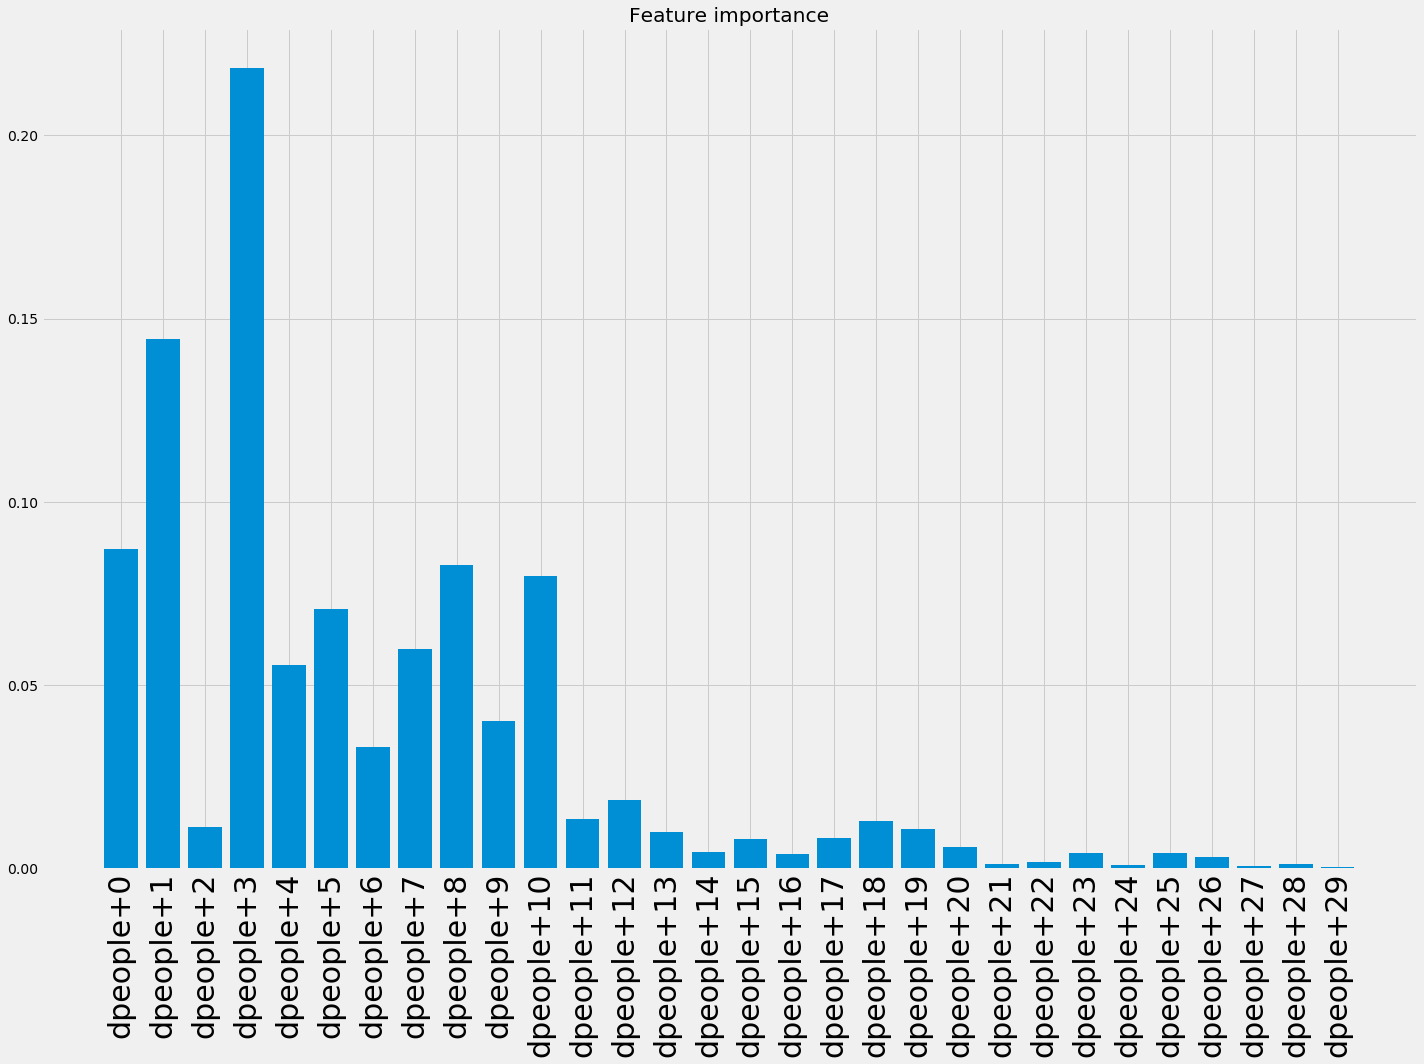

In [120]:
import numpy as np

plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(20,15))

importances = model.feature_importances_

indices = np.argsort(importances[::-1])
indices = np.arange(day-1,-1,-1)
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f"%(f+1,30,feat_labels[indices[f]],
                         importances[indices[f]]))
plt.title('Feature importance')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), feat_labels[indices], rotation=90,fontsize=30)
plt.tight_layout()
plt.savefig('dpeople importants.png')
plt.show()

In [85]:
# 1~7 일 정도의 데이터가 제일 중요하고 이후날짜의 데이터는 크게 중요치 않음